In [105]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [106]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [78]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.00001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(500),
    my_dense_layer(50),
    my_dense_layer(250),
    my_dense_layer(10, activation="softmax")
])

In [79]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=["accuracy"])

In [80]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.6143 - accuracy: 0.7944 - val_loss: 0.4382 - val_accuracy: 0.8514
Epoch 2/20
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.4208 - accuracy: 0.8553 - val_loss: 0.3947 - val_accuracy: 0.8674
Epoch 3/20
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.3787 - accuracy: 0.8689 - val_loss: 0.3617 - val_accuracy: 0.8722
Epoch 4/20
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.3504 - accuracy: 0.8770 - val_loss: 0.3478 - val_accuracy: 0.8800
Epoch 5/20
55000/55000 [==============================] - 59s 1ms/sample - loss: 0.3298 - accuracy: 0.8834 - val_loss: 0.3368 - val_accuracy: 0.8814
Epoch 6/20
55000/55000 [==============================] - 65s 1ms/sample - loss: 0.3145 - accuracy: 0.8899 - val_loss: 0.3557 - val_accuracy: 0.8756
Epoch 7/20
55000/55000 [==============================] -

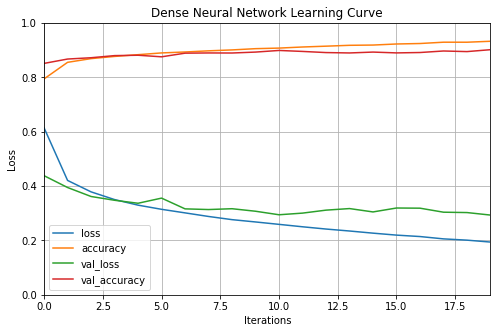

<Figure size 432x288 with 0 Axes>

In [100]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,19)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Dense Neural Network Learning Curve')
plt.show()
plt.savefig('DNN_Learning_Curve.png')

In [101]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4985    0   36   65   13    1  441    0    2    0]
 [   4 5380    2   44   10    0    4    0    0    0]
 [  53    0 4697   34  430    0  282    0    0    0]
 [  47    1    7 5276  108    0   60    0    0    0]
 [   2    2  228  127 4950    0  202    0    1    0]
 [   0    0    0    0    0 5497    0   10    0    0]
 [ 346    3  176   73  235    0 4673    0    1    0]
 [   0    0    0    0    0    7    0 5449    2   30]
 [   4    0    1    8   11    0    6    2 5478    0]
 [   0    0    0    0    0    2    0  158    1 5333]]


In [82]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3226212511062622, 0.8922]

In [83]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[850   2   7  19   5   2 111   0   4   0]
 [  3 961   4  21   6   0   5   0   0   0]
 [ 11   0 787  17 100   1  84   0   0   0]
 [ 16   3   7 915  25   0  31   0   3   0]
 [  1   0  68  31 838   0  60   0   2   0]
 [  0   0   0   1   0 972   0  19   0   8]
 [108   0  62  26  72   0 727   0   5   0]
 [  0   0   0   0   0  15   0 970   1  14]
 [  6   0   3   6   4   2  12   6 961   0]
 [  0   0   0   0   0   8   1  50   0 941]]


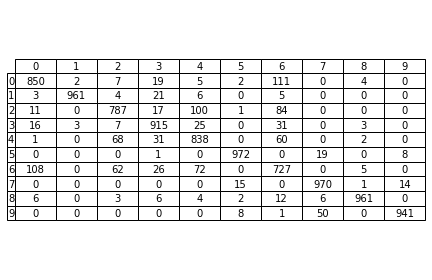

In [85]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_dense.png')